In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('VeinteDatos.csv')
#modificacion de datos
df.loc[df['ID'] == 1, 'Salario'] = 5000
df.loc[df['ID'] == 2, 'Salario'] = 6000
df.loc[df['ID'] == 10, 'Salario'] = 670000
df.loc[df['ID'] == 6, 'Edad'] = 25
df.loc[df['ID'] == 17, 'Edad'] = 32

#rellenar datos con la media
df.fillna({'Salario': df['Salario'].mean()}, inplace=True)
display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23.0,5000.000000,2020-01-10
1,2,Luis,35.0,6000.000000,2019-06-15
2,3,Carlos,30.0,91411.764706,2020-03-25
3,4,María,22.0,58000.000000,NaN
4,5,Elena,28.0,49000.000000,2018-07-30
5,6,Jorge,25.0,62000.000000,2017-09-14
6,7,Sofía,34.0,72000.000000,2016-11-22
7,8,Andrés,45.0,61000.000000,2021-04-01
8,9,Laura,29.0,52000.000000,2015-05-19
9,10,Pedro,41.0,670000.000000,2014-08-25


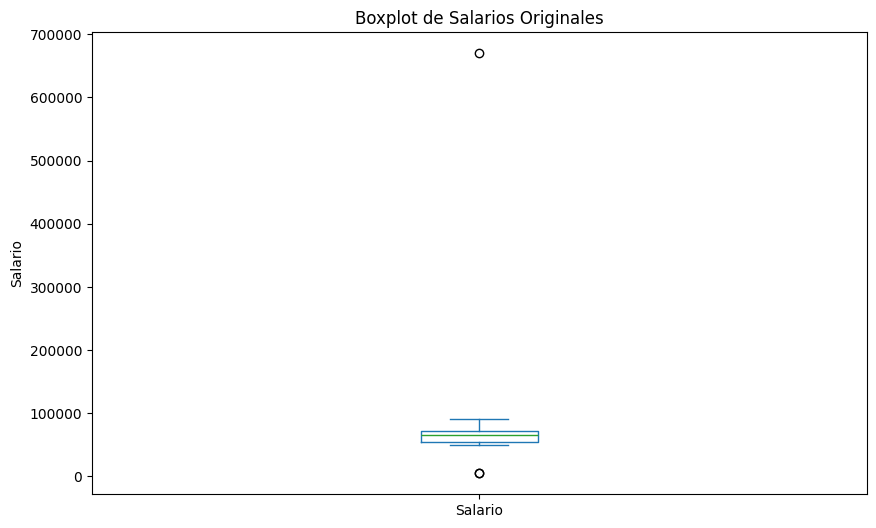

In [7]:
#graficar, previsualizacion inicial
plt.figure(figsize=(10,6))
df['Salario'].plot(kind='box', title='Boxplot de Salarios Originales')
plt.ylabel('Salario')
plt.show()

In [9]:
#salario capped
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identificacion de datos atipicos
outliers = df[(df['Salario'] < lower_bound) | (df['Salario'] > upper_bound)]
display(outliers)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23.0,5000.0,2020-01-10
1,2,Luis,35.0,6000.0,2019-06-15
9,10,Pedro,41.0,670000.0,2014-08-25


In [13]:
df['Salario_Capped'] = np.where(
    (df['Salario'] < lower_bound) | (df['Salario'] > upper_bound),
    df['Salario'].median(),
    df['Salario'] #que columna vamos a reemplazar
)
display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso,Salario_Capped
0,1,Ana,23.0,5000.000000,2020-01-10,65000.000000
1,2,Luis,35.0,6000.000000,2019-06-15,65000.000000
2,3,Carlos,30.0,91411.764706,2020-03-25,91411.764706
3,4,María,22.0,58000.000000,NaN,58000.000000
4,5,Elena,28.0,49000.000000,2018-07-30,49000.000000
5,6,Jorge,25.0,62000.000000,2017-09-14,62000.000000
6,7,Sofía,34.0,72000.000000,2016-11-22,72000.000000
7,8,Andrés,45.0,61000.000000,2021-04-01,61000.000000
8,9,Laura,29.0,52000.000000,2015-05-19,52000.000000
9,10,Pedro,41.0,670000.000000,2014-08-25,65000.000000


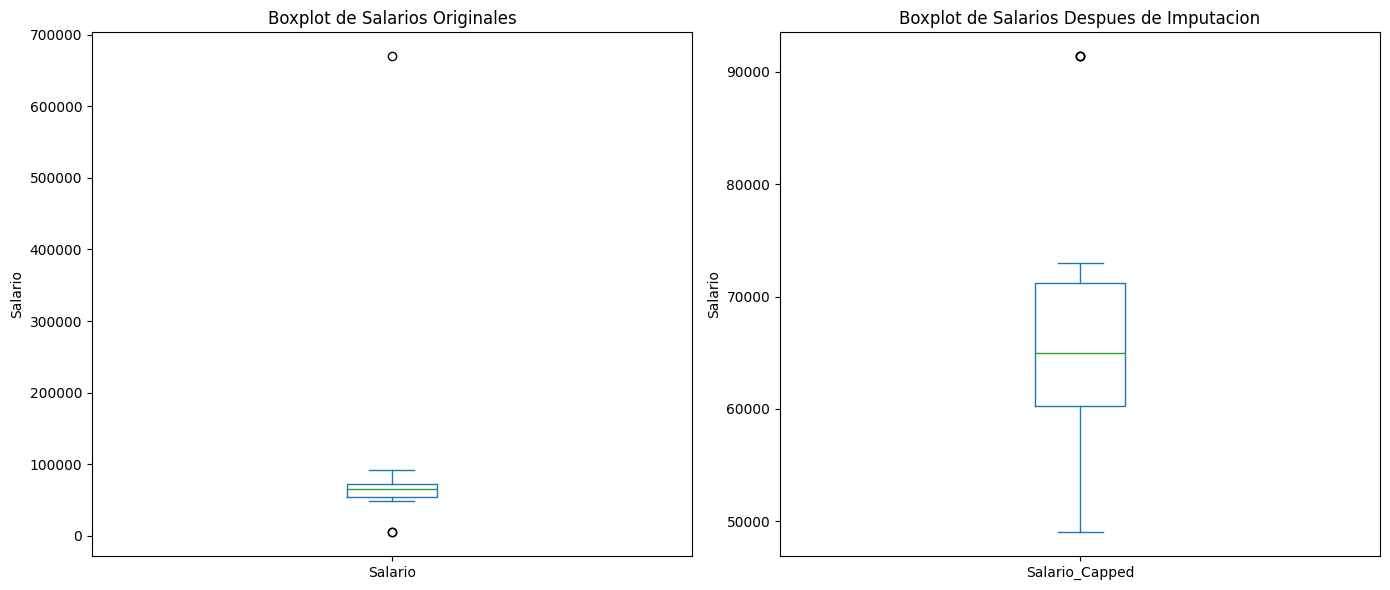

In [14]:
#visualizar salarios capped
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Salario'].plot(kind='box', title='Boxplot de Salarios Originales')
plt.ylabel('Salario')
plt.subplot(1,2,2)
df['Salario_Capped'].plot(kind='box', title='Boxplot de Salarios Despues de Imputacion')
plt.ylabel('Salario')

#visualizar Graficos
plt.tight_layout()
plt.show()

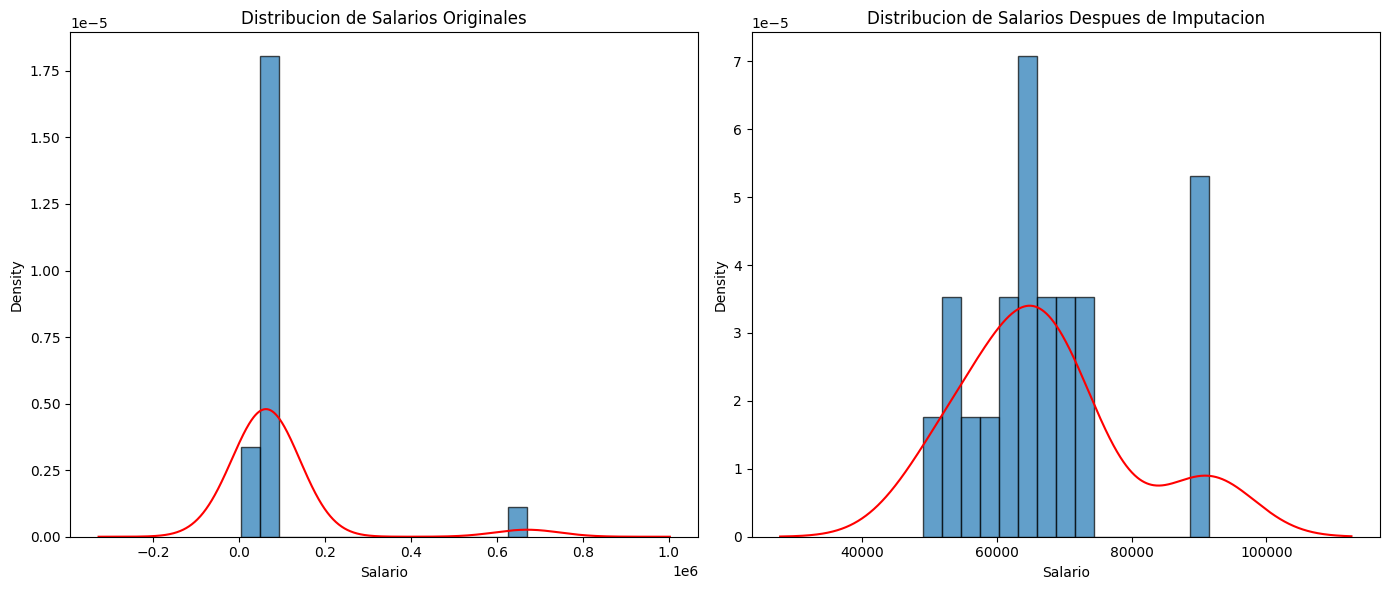

In [18]:
#Visualizar con histogramas
#declaro la figura
plt.figure(figsize=(14,6))

#declaracion de histograma de los salarios originales
plt.subplot(1,2,1)
df['Salario'].plot(kind='hist', bins=15, edgecolor='black', density=True, alpha=0.7, title='Distribucion de Salarios Originales')
df['Salario'].plot(kind='kde', color='red')
plt.xlabel('Salario')

#declaracion de histograma para salarios despues de la imputacion
plt.subplot(1,2,2)
df['Salario_Capped'].plot(kind='hist', bins=15, edgecolor='black', density=True, alpha=0.7, title='Distribucion de Salarios Despues de Imputacion')
df['Salario_Capped'].plot(kind='kde', color='red')
plt.xlabel('Salario')

#visualizar histogramas
plt.tight_layout()
plt.show()

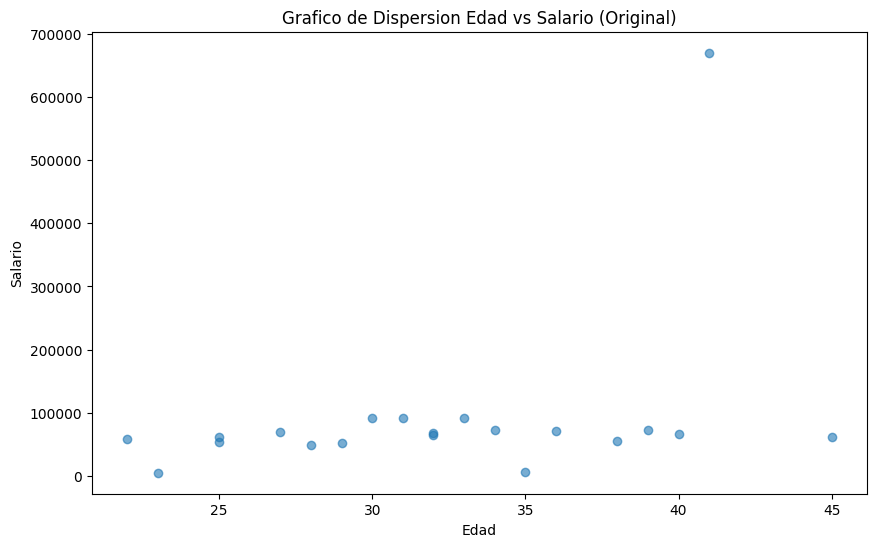

In [19]:
#graficos de dispersion
#scatterplot

plt.figure(figsize=(10,6))

plt.scatter(df['Edad'], df['Salario'], alpha=0.6) #alpha es un parametro de transparencia
plt.title('Grafico de Dispersion Edad vs Salario (Original)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

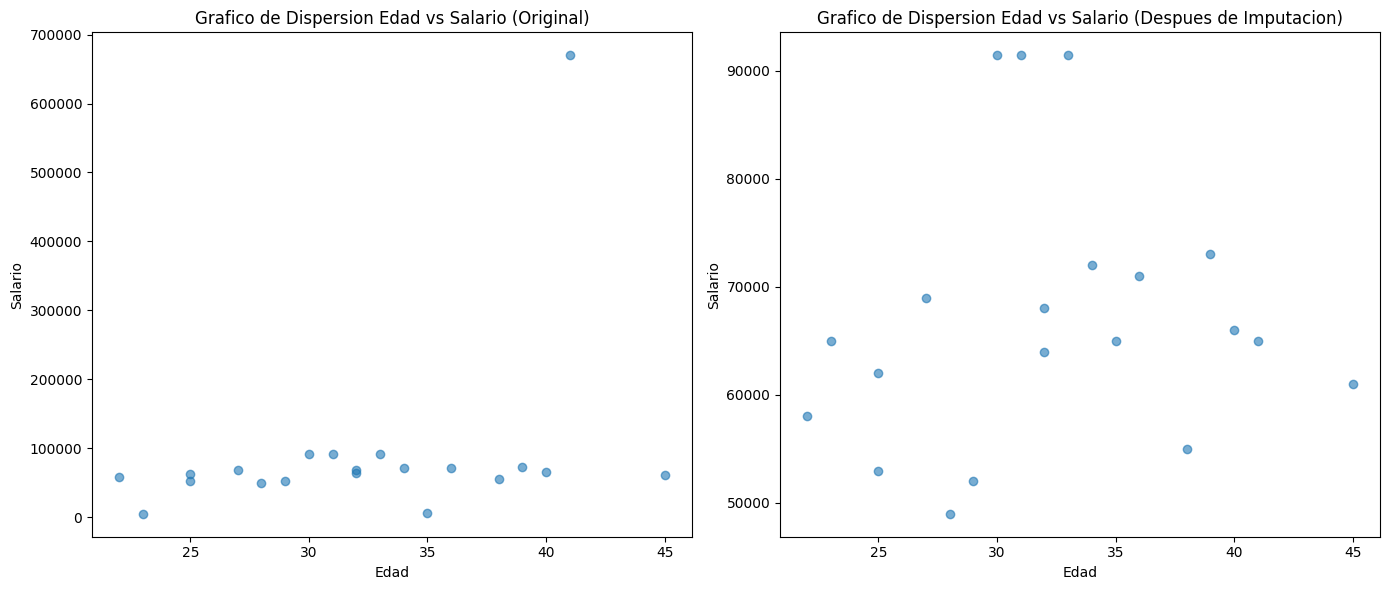

In [20]:
#comparacion de graficos de dispersion antes y despues
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df['Edad'], df['Salario'], alpha=0.6)
plt.title('Grafico de Dispersion Edad vs Salario (Original)')
plt.xlabel('Edad')
plt.ylabel('Salario')

plt.subplot(1,2,2)
plt.scatter(df['Edad'], df['Salario_Capped'], alpha=0.6)
plt.title('Grafico de Dispersion Edad vs Salario (Despues de Imputacion)')
plt.xlabel('Edad')
plt.ylabel('Salario')

plt.tight_layout()
plt.show()